<a href="https://colab.research.google.com/github/Abhi3279/sales_analysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expectation : need a clarity on who is spending more money for shopping in case of gender , age_group , product_category , marital_status , state .

In [ ]:
# Import all necessary packages .
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the DataFrame.
df=pd.read_csv('/content/Diwali Sales Data.csv',encoding='ISO-8859-1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# checking null values in entire dataframe.
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
#drop umwanted columns such as status and unnamed1
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [ ]:
# delete duplicates columns from dataframe .
df=df.drop_duplicates()

In [ ]:
#delete null value from rows .
df.dropna(inplace=True)

/tmp/ipython-input-12-869611108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


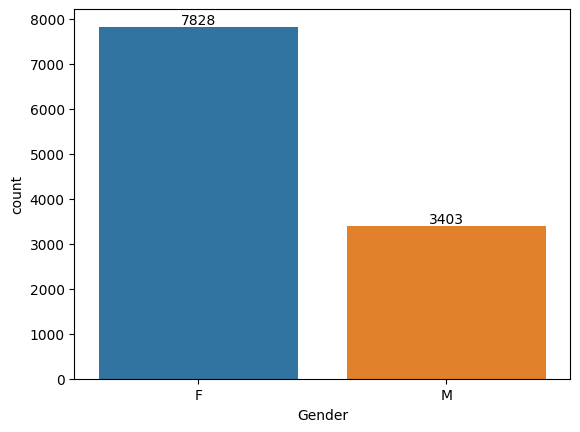

In [ ]:
# plotting a barchart for gender and its count conclusion
var=sns.countplot(x='Gender',data=df, hue='Gender')
for i in var.containers :
  var.bar_label(i)

conclusion := from the above graph we have concluded count of female are more

In [ ]:
#change the values of Marital col 0-->single,  1--> married

df['Marital_Status']=df['Marital_Status'].map({0:'single',1:'married'})
df.head()

/tmp/ipython-input-14-4225617895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status']=df['Marital_Status'].map({0:'single',1:'married'})


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
#change the values of Gender column F-->Female,  M-->Male
df["Gender"]=df["Gender"].map({"M":"Male","F":"Female"})
df

/tmp/ipython-input-15-622734205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"]=df["Gender"].map({"M":"Male","F":"Female"})


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,Male,18-25,19,married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,Male,26-35,33,single,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,Female,36-45,40,single,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,Male,36-45,37,single,Karnataka,Southern,Agriculture,Office,3,206.0


/tmp/ipython-input-17-992153877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var=sns.barplot(data=a,palette='dark')


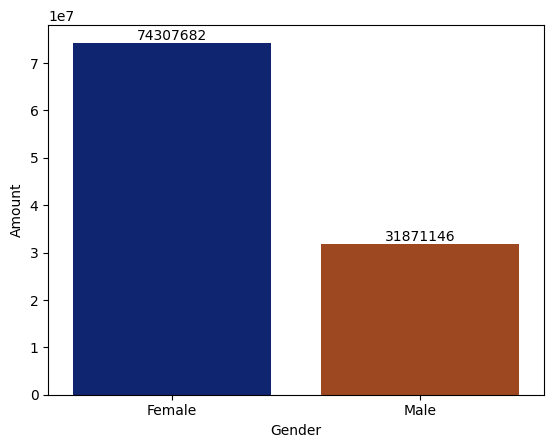

In [ ]:
# plotting a bar graph to find relation between gender and and total amount .
a = df.groupby("Gender")["Amount"].sum()
var=sns.barplot(data=a,palette='dark')
for i in var.containers :
  var.bar_label(i, fmt = "%d")


conclusion := from the above graph we have concluded females are spending much amount so purchasing power of female are more .

/tmp/ipython-input-25-3328395445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  var=sns.barplot(data=dff,x='Amount',y='State',palette='pastel')


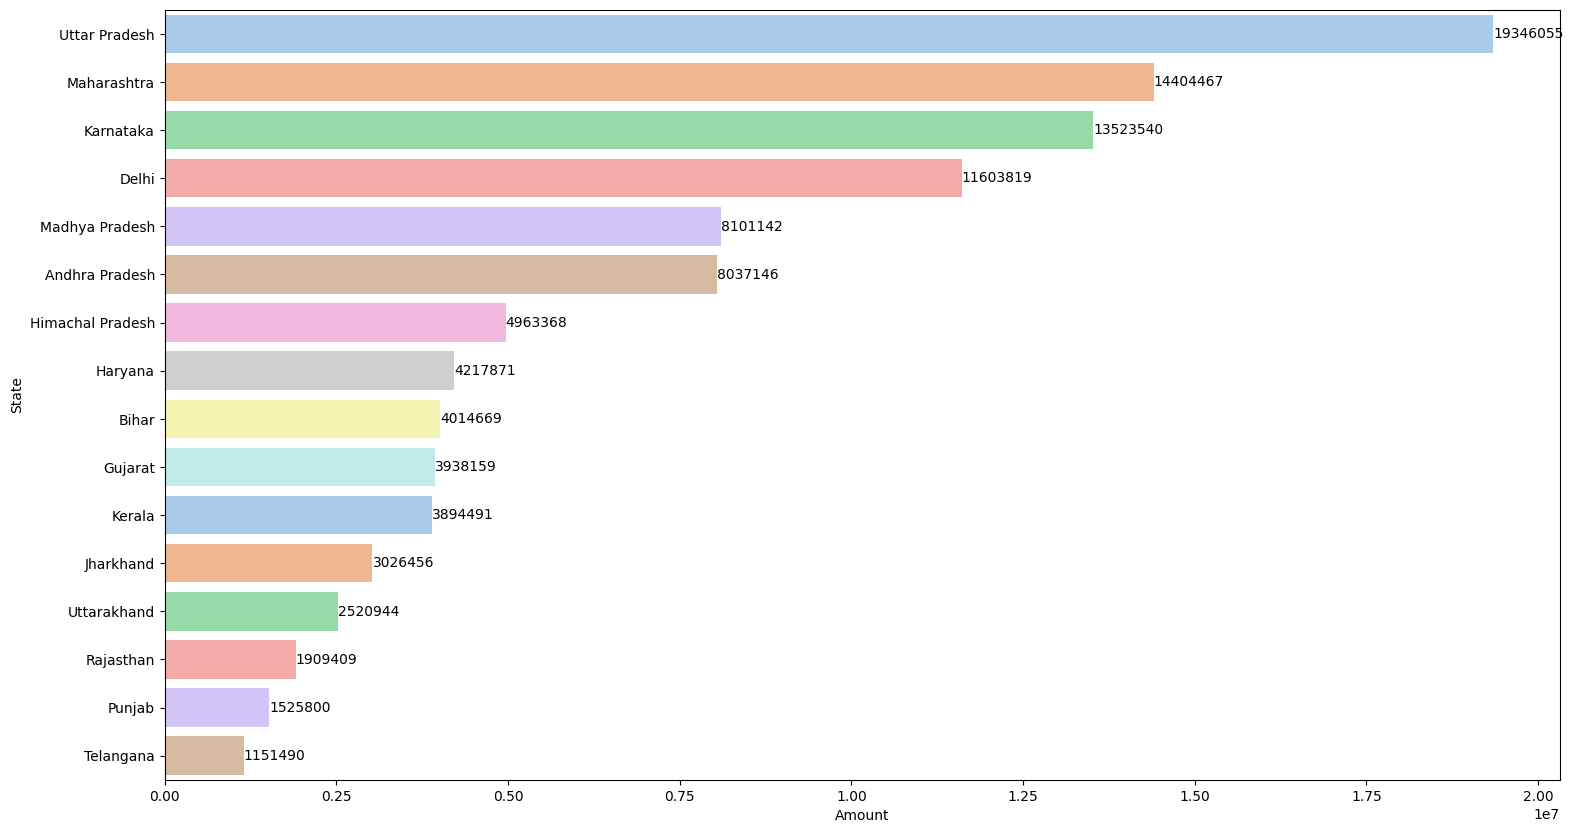

In [ ]:
# plotting the bar graph between states and total amount

plt.figure(figsize=(18,10))
a=df.groupby('State')['Amount'].sum().sort_values(ascending = False)
dff=pd.DataFrame(a)
var=sns.barplot(data=dff,x='Amount',y='State',palette='pastel')

for i in var.containers :
  var.bar_label(i, fmt = "%d")

conclusion :-  from the above graph we have concluded states like uttar pradesh,  maharashtra,karnataka are spending much amount .

In [ ]:
# finding the top 5 maximum amount with customer name .
r=df.groupby('Cust_name')['Amount'].max()
tpo_customer = r.nlargest(5)# usd to fetch top 5 values or ten values with name based on amount . nlargest will  only work with group by
tpo_customer

,Amount
Cust_name,
Sanskriti,23952.0
Kartik,23934.0
Bindu,23924.0
Sudevi,23912.0
Joni,23877.0


conclusion :- a customer sanskriti has spent maximum amount .

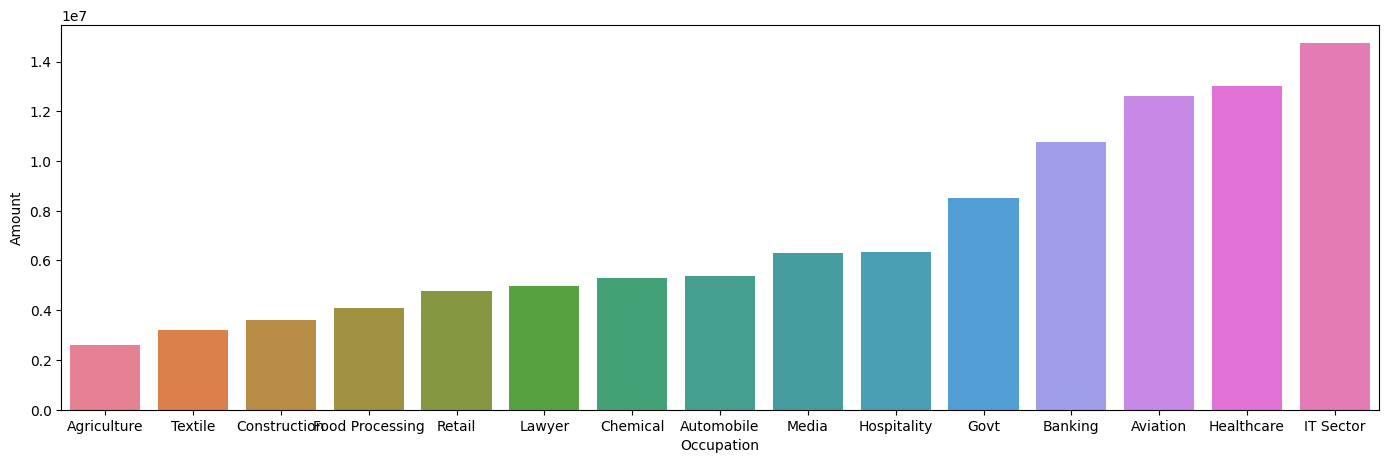

In [ ]:
# Finding the relation between occupation and total_amount by using bar graph .

plt.figure(figsize=(17,5))
var=df.groupby("Occupation")['Amount'].sum().sort_values(ascending=True)
dff=pd.DataFrame(var)
var2=sns.barplot(x='Occupation',y='Amount',data=dff,hue='Occupation')

Conclusion :- from the avove graph we can see that the most of the biesd are working in IT sector , health sector and aviation sector .

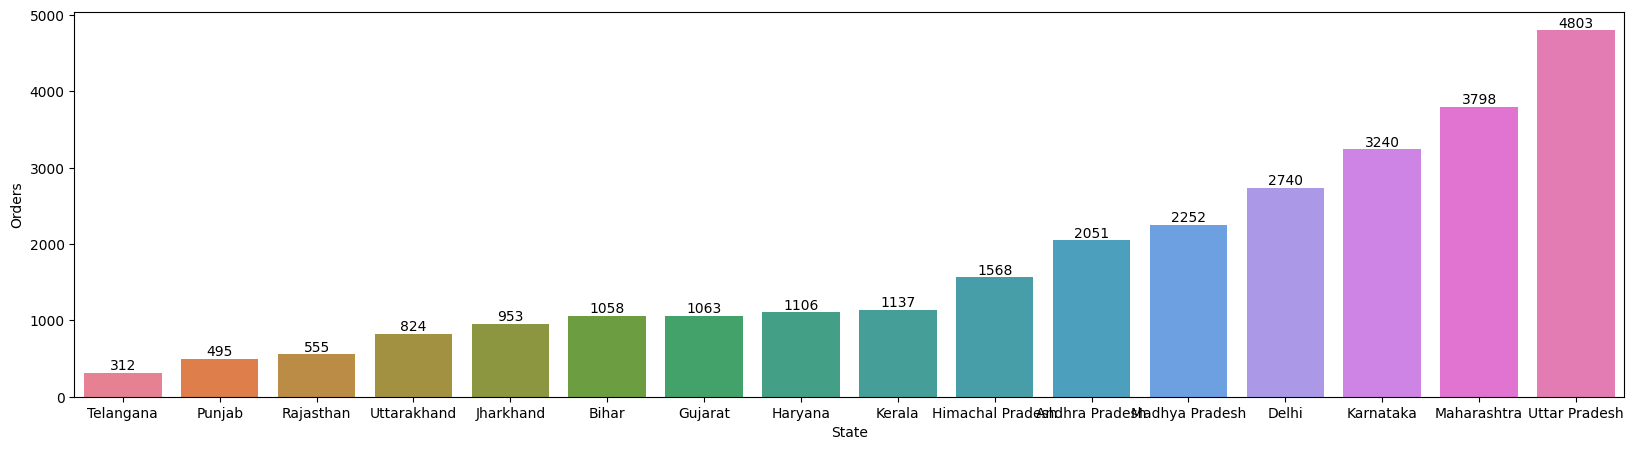

In [ ]:
# Total order sold by,based on states .
plt.figure(figsize=(20,5))
#sns.set_context(rc= {"figure:figsize":(15,5)})
s=df.groupby("State")["Orders"].sum().sort_values(ascending=True)
dff=pd.DataFrame(s)
a = sns.barplot(x='State',y="Orders",data=dff,hue="State")

for i in a.containers:
  a.bar_label(i)

Conclusion :- from the above graph we have concluded states like uttar pradesh,maharashtra,karnataka are ordering most.



/tmp/ipython-input-30-2895020062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  var=sns.barplot(x="Amount",y="Occupation",data=dff,palette="pastel")


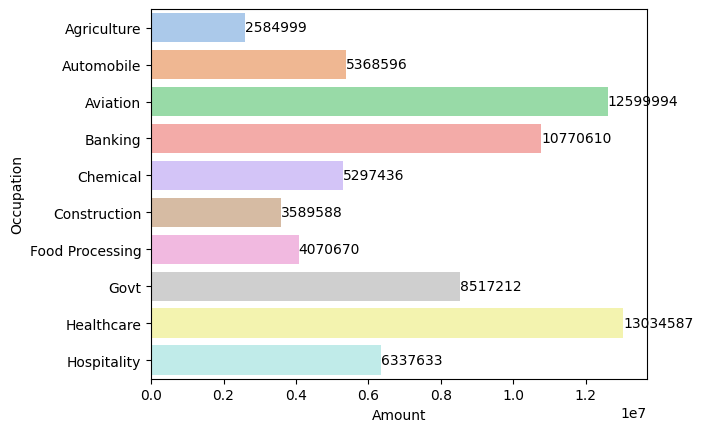

In [ ]:
# Top ten occupation.
ten=df.groupby("Occupation")["Amount"].sum().head(10)
dff=pd.DataFrame(ten)
var=sns.barplot(x="Amount",y="Occupation",data=dff,palette="pastel")
for i in var.containers:
  var.bar_label(i, fmt= "%d") # converts to integers (without decimal)


Conclusion :- from the above graph we have concluded occupations like  spending much amount .

In [ ]:
# Counting the value of each product_category .
df['Product_Category'].unique()
df['Product_Category'].value_counts()

,count
Product_Category,
Clothing & Apparel,2653
Food,2490
Electronics & Gadgets,2082
Footwear & Shoes,1059
Household items,520
Beauty,422
Games & Toys,386
Sports Products,356
Furniture,352


/tmp/ipython-input-32-541405591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var=sns.barplot(x='Product_Category',y='Amount',data=dff,palette="husl")


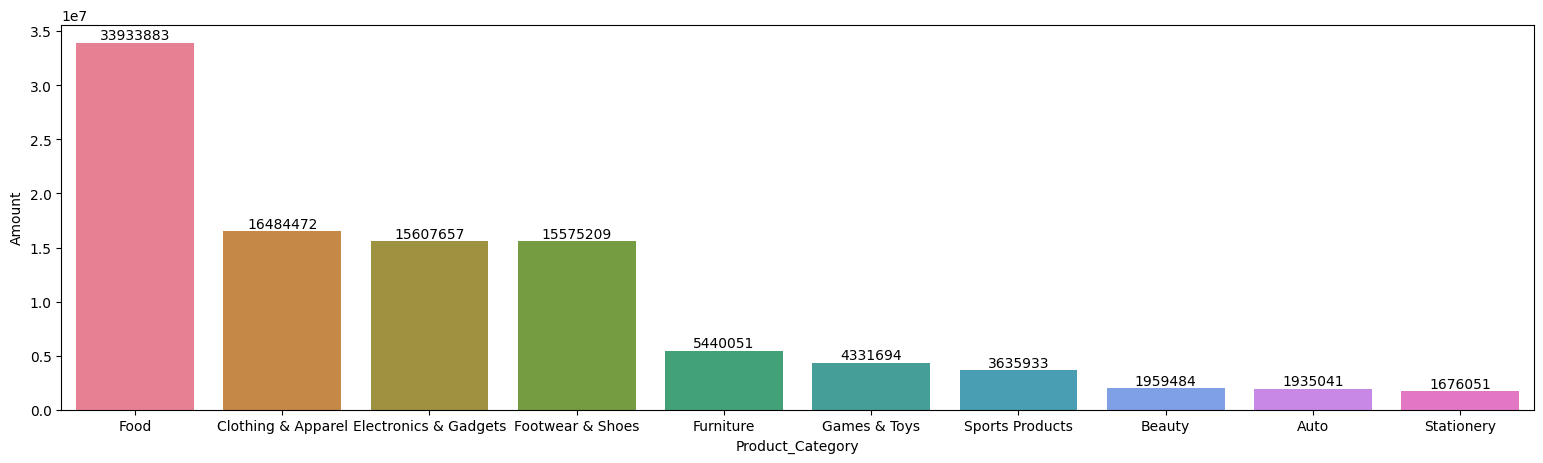

In [ ]:
# Relation between product category and  total amount .
plt.figure(figsize=(19,5))
ten=df.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False).head(10)
dff=pd.DataFrame(ten)
var=sns.barplot(x='Product_Category',y='Amount',data=dff,palette="husl")
for i in var.containers:
  var.bar_label(i, fmt= "%d")

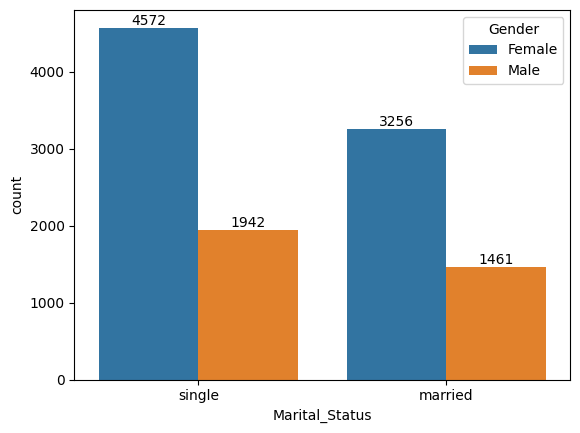

In [ ]:
#Groupby based on marital_status .
var=sns.countplot(x='Marital_Status',data=df, hue = "Gender")
for i in var.containers:
  var.bar_label(i)
  df

Index(['Orders'], dtype='object')


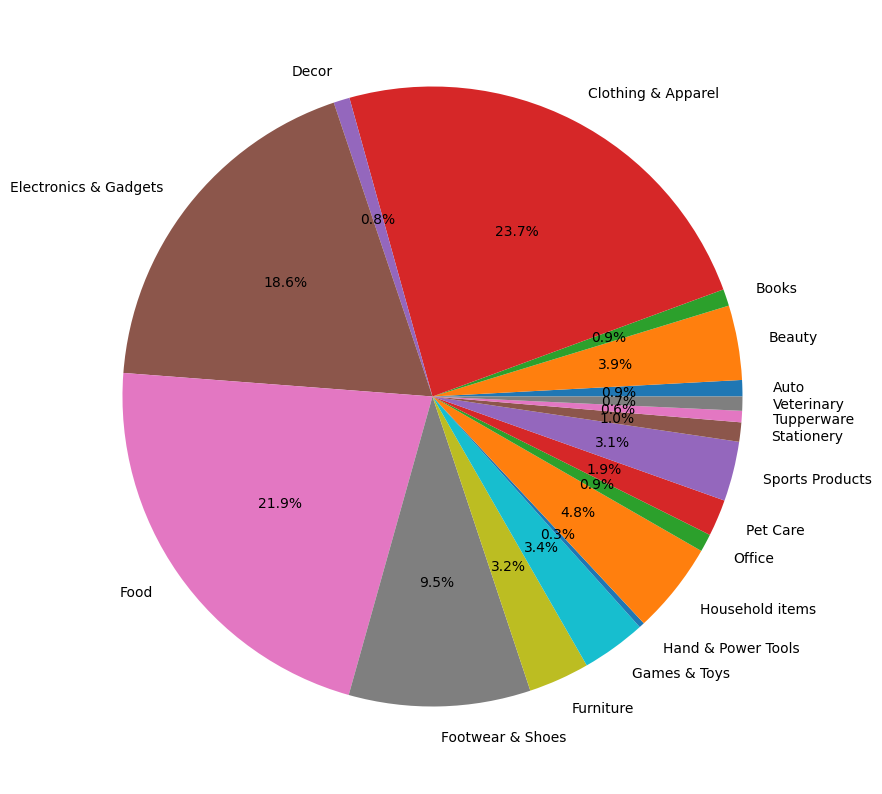

In [ ]:
# createing pie chart bsed on product_category .
plt.figure(figsize = (10,20))
var=df.groupby("Product_Category")["Orders"].sum()
dff=pd.DataFrame(var)

plt.pie(var,labels = var.index,autopct="%0.1f%%")
#dff["Orders"].unique()
print(dff.columns)

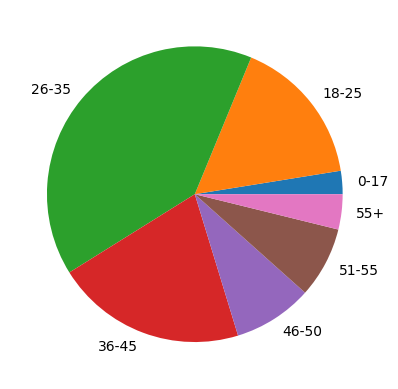

In [ ]:
# plotting pie chart for age group
var=df.groupby("Age Group")["Amount"].sum()
plt.pie(var, labels = var.index)
plt.show()

<Axes: ylabel='Age'>

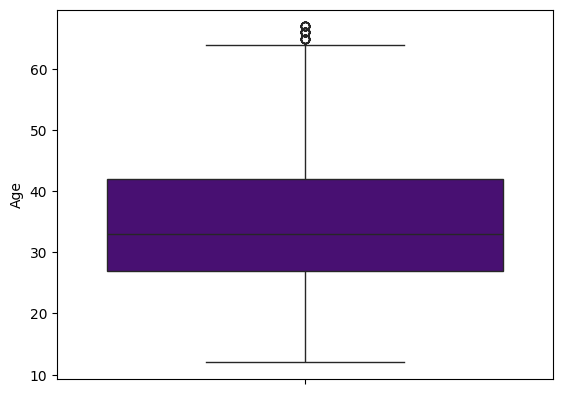

In [ ]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
outliers = df[(df["Age"]<lower_bound)|(df["Age"]>upper_bound)]
outliers
cleaned=df[(df["Age"]>=lower_bound)&(df["Age"]<=upper_bound)]
cleaned
sns.boxplot(data = cleaned["Age"],color="indigo")

In [ ]:
 """OBJECTIVE := To analysis customer purchase behaviour across different product categories and find ou the trends that can drive marketing
startegy and improve sale performance """

''' step 1 : data cleaning and preparation
     1. check for null values or incorrect data type .
     2. ensure consistency in categorical data (correct gender)
     3. convert column like age into integer .
     4. map marital status to labels.(0= unmarried , 1= unmarried)


      step 2 : descriptive analysis and insights
       1.gender distribution
       insights : majority of customers are females(~60 to 65%)
       interpetation : marketing campaige might be more effective for women for certain product categories

       2. age group distribution
       (1) top group : 26 to 35 years
       interpetation : product pricing and campigns should allien with this age groups .
       marital status : unmarried are generating greater total sales .
      interpetation : we should give offers more to the young age people during festive seasons .

       3. state analysis

       (1) state leaders : up , maharashtra , and karnataka are the top contributers .
       (2) action : invest more in local permotions and logistics in this high performing states .'''


# **CONCLUSION**
''' Based on the above analysis I can conclude that single females of age group 26- 35 from uttar pradesh , maharashtra , and karnataka working in IT sector ,health care , aviation spending more money on food , electronic & gadgets , clothes and footwear .'''
